In [1]:
import os
import json
import importlib

import glob as gb
import utils as ut
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as pyw
import matplotlib.pyplot as plt

from tqdm import tqdm
from IPython.display import HTML, display, clear_output

In [2]:
importlib.reload(ut);

In [3]:
%matplotlib inline

# Global

In [4]:
dark_mode = True

In [5]:
plt.rcParams['text.usetex'] = True
plt.style.use(['dark_background' if dark_mode else 'default'])

In [6]:
pd.set_option('display.max_colwidth', None)

# Data

## Load

In [7]:
# load data
path = os.path.join('data', 'input', 'v10-cone', '**', '*.zip')
data = ut.load_data(path, limit=1)

extract /tmp/tmph8so51_v/AOS-Simulation-2021-09-11-13-14-36


In [8]:
# select simulation
index = 0
simulation = list(data.keys())[index]
print('simulations:\n', '\n '.join([f'{i:02d}: ' + (f'{x} [x]' if x == simulation else x) for i, x in enumerate(list(data.keys()))]))

simulations:
 00: AOS-Simulation-2021-09-11-13-14-36 [x]


## Preview

In [9]:
# show images
df = data[simulation]['images']
df.filter(regex=r'^(?:(?!data).)*$')

,number,name,type,x,y,z,url
0,1,image-1-monochrome.png,monochrome,-70.0,0.0,0.0,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=-70.00&drone.northSouth=0.00&drone.camera.view=90
1,2,image-2-monochrome.png,monochrome,-69.0,0.0,0.0,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=-69.00&drone.northSouth=0.00&drone.camera.view=90
2,3,image-3-monochrome.png,monochrome,-68.0,0.0,0.0,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=-68.00&drone.northSouth=0.00&drone.camera.view=90
3,4,image-4-monochrome.png,monochrome,-67.0,0.0,0.0,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=-67.00&drone.northSouth=0.00&drone.camera.view=90
4,5,image-5-monochrome.png,monochrome,-66.0,0.0,0.0,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=-66.00&drone.northSouth=0.00&drone.camera.view=90
...,...,...,...,...,...,...,...
277,278,image-278-monochrome.png,monochrome,-66.0,0.0,70.0,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=-66.00&drone.northSouth=70.00&drone.camera.view=90
278,279,image-279-monochrome.png,monochrome,-67.0,0.0,70.0,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=-67.00&drone.northSouth=70.00&drone.camera.view=90
279,280,image-280-monochrome.png,monochrome,-68.0,0.0,70.0,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=-68.00&drone.northSouth=70.00&drone.camera.view=90
280,281,image-281-monochrome.png,monochrome,-69.0,0.0,70.0,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=-69.00&drone.northSouth=70.00&drone.camera.view=90


In [10]:
# show trees
data[simulation]['trees']

,tree,position.x,position.y,position.z,box.min.x,box.min.y,box.min.z,box.max.x,box.max.y,box.max.z
0,1,-49.680927,0.0,68.184723,-52.718716,0.0,65.130203,-46.643143,24.252220,71.239243
1,2,57.781857,0.0,-43.160156,54.769150,0.0,-46.189457,60.794567,24.052090,-40.130852
2,3,-23.378712,0.0,44.097115,-26.431494,0.0,41.027515,-20.325928,24.371891,47.166714
3,4,-31.343758,0.0,39.550213,-34.348366,0.0,36.529053,-28.339148,23.987461,42.571373
4,5,-21.856693,0.0,52.035313,-24.989437,0.0,48.885311,-18.723949,25.010000,55.185310
...,...,...,...,...,...,...,...,...,...,...
295,296,-57.451389,0.0,19.198940,-60.584133,0.0,16.048941,-54.318642,25.010000,22.348940
296,297,14.287553,0.0,11.282220,11.257990,0.0,8.235970,17.317116,24.186592,14.328471
297,298,25.795835,0.0,20.282452,22.758898,0.0,17.228786,28.832773,24.245440,23.336117
298,299,-30.279554,0.0,21.780756,-33.261520,0.0,18.782368,-27.297590,23.806740,24.779146


In [11]:
# show persons
data[simulation]['persons']

""


In [12]:
# show parameters
parameters = data[simulation]['parameters']
print('parameters:', json.dumps(parameters, indent=4))

parameters: {
    "drone": {
        "speed": 10,
        "height": 35,
        "rotation": 0,
        "camera": {
            "view": 90,
            "resolution": 512,
            "sampling": 1,
            "type": "monochrome"
        },
        "coverage": 69.99999999999999
    },
    "forest": {
        "size": 300,
        "ground": 70,
        "persons": {
            "count": 0,
            "activities": {
                "laying": true,
                "sitting": false,
                "standing": true,
                "waving": true,
                "injured": false,
                "walking": true,
                "running": false
            }
        }
    },
    "material": {
        "color": {
            "tree": 6370837,
            "twig": 5601109,
            "ground": 65793,
            "plane": 16777215,
            "person": 16744319,
            "background": 8900331
        }
    },
    "capture": true,
    "preset": "forest-21",
    "url": "https://aos.tensorwar

In [13]:
# show subsamples
N, M = ut.sample_data(parameters)
print('subsamples:', json.dumps({'N': N, 'M': M}, indent=4))

subsamples: {
    "N": {
        "70": 1,
        "35": 2,
        "23": 3,
        "17": 4,
        "14": 5,
        "12": 6,
        "10": 7,
        "9": 8,
        "8": 9,
        "7": 10,
        "6": 12,
        "5": 14,
        "4": 18,
        "3": 23,
        "2": 35,
        "1": 70
    },
    "M": {
        "70": 1.0,
        "35": 2.0,
        "23": 3.0,
        "17": 4.0,
        "14": 5.0,
        "12": 6.0,
        "10": 7.0,
        "9": 8.0,
        "8": 9.0,
        "7": 10.0,
        "6": 12.0,
        "5": 14.0,
        "4": 18.0,
        "3": 23.0,
        "2": 35.0,
        "1": 70.0
    }
}


# Plots

## Original Images

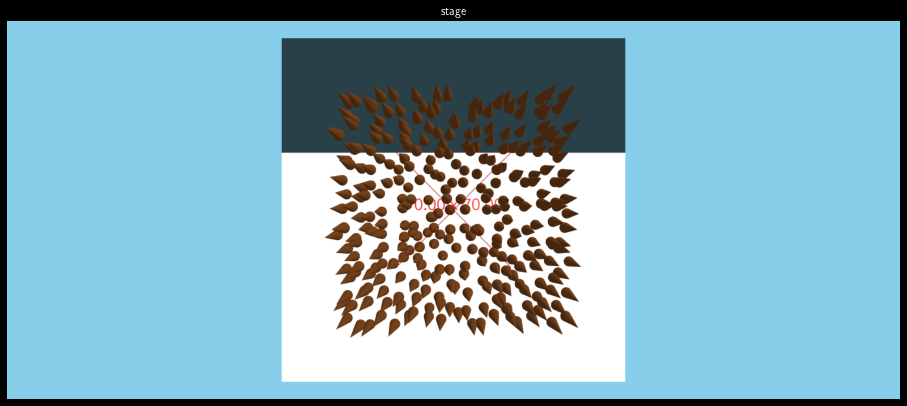

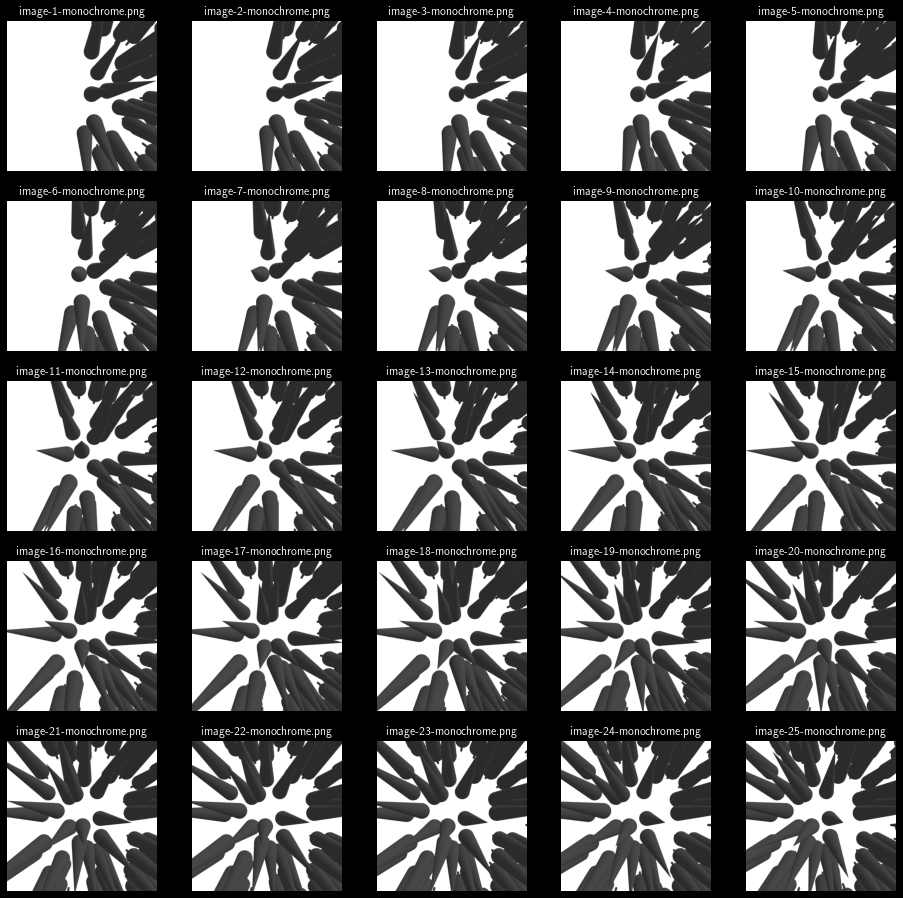

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))

# plot stage image
ut.plot_image(ax, data[simulation]['stage'], 'stage')

# plot first images
ut.plot_images(df['data'], df['name']);

## Sampled Images

In [15]:
df_sampled = df.iloc[::N[1], :][['number', 'x', 'z', 'url']]

# simulation urls
display(HTML(df_sampled.style.format({'url': lambda x: f'<a onclick="document.getElementById(\'aos-simulation\').src=\'{x}\'">{x}</a>'})._repr_html_()))

,number,x,z,url
0,1,-70.000000,0.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=-70.00&drone.northSouth=0.00&drone.camera.view=90
70,71,0.000000,0.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=0.00&drone.northSouth=0.00&drone.camera.view=90
140,141,70.000000,0.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=70.00&drone.northSouth=0.00&drone.camera.view=90
210,211,1.000000,70.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=1.00&drone.northSouth=70.00&drone.camera.view=90
280,281,-69.000000,70.000000,https://aos.tensorware.app/#preset=forest-21&drone.height=35&drone.rotation=0&drone.eastWest=-69.00&drone.northSouth=70.00&drone.camera.view=90


In [16]:
# simulation iframe
# display(HTML(f'<iframe id="aos-simulation" src="{parameters["url"]}" width="1028" height="720" frameborder="0" allowfullscreen>'))

## Integrated Images

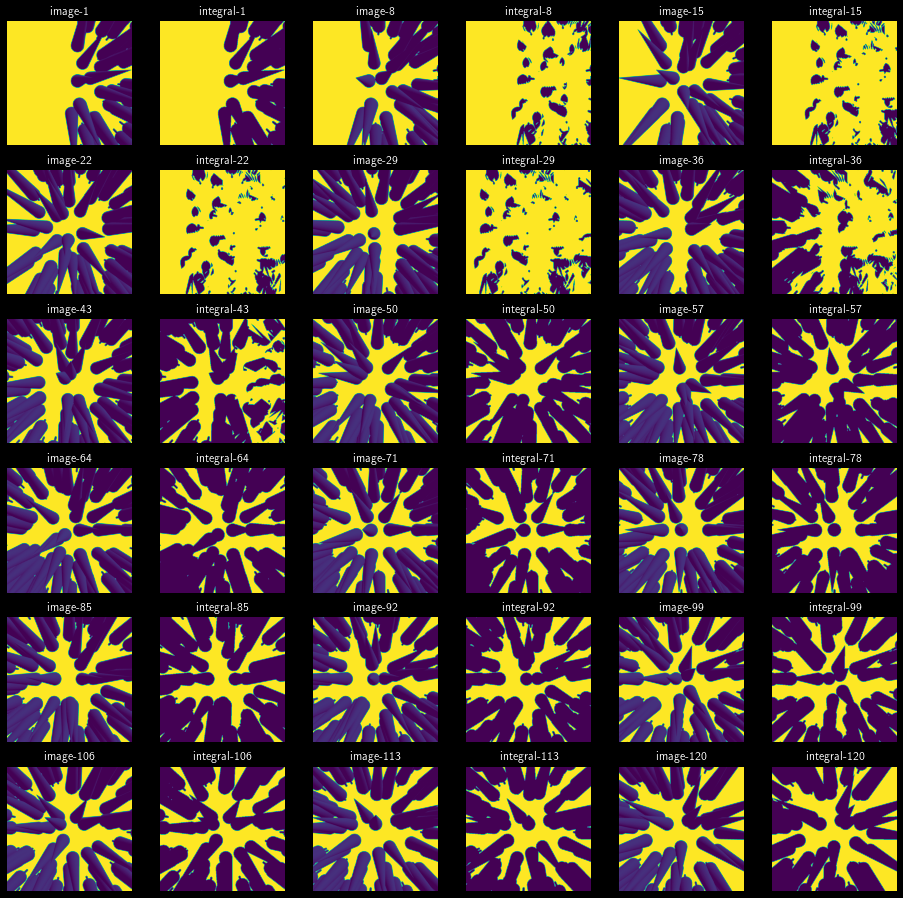

In [17]:
df_integrate = df.iloc[::N[10], :].head(18)

# integrate images
integrated = ut.integrate_image(df_integrate, parameters, N=30)

# grayscale images
grayscaled = np.array([ut.grayscale_image(x) for x in df_integrate['data']])

# stack integrated images
image_vs_integrated = np.hstack([grayscaled, integrated]).reshape(integrated.shape * np.array([2, 1, 1]))
image_vs_integrated_labels = np.dstack(['image-' + df_integrate['number'].astype(np.str), 'integral-' + df_integrate['number'].astype(np.str)]).flatten()

# plot integrated images
ut.plot_images(image_vs_integrated, image_vs_integrated_labels, rows=6, cols=6);

## Integrated Ground

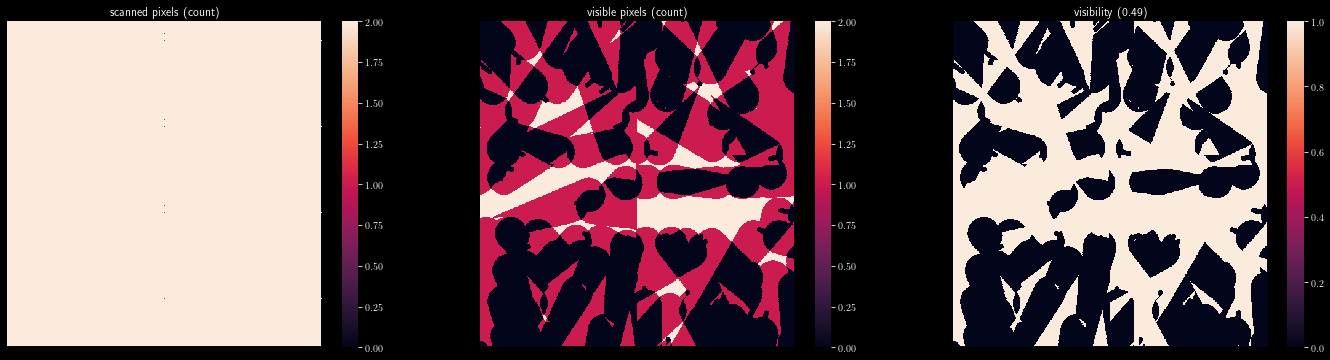

In [18]:
df_images = df.iloc[::N[2], :]

# integrate ground
ground, alphas = ut.integrate_ground(df_images, parameters)

# aggregate alphas
df_alpha = ut.aggregate_alphas(alphas, sample=None)

# calculate ground visibility
scanned = np.count_nonzero(ground[:, :, 0])
visible = np.count_nonzero(ground[:, :, 1])
visibility = visible / scanned

# plot integrated ground
ut.plot_ground(ground, ['scanned pixels (count)', 'visible pixels (count)', f'visibility ({visibility:.2f})']);

## Statistics

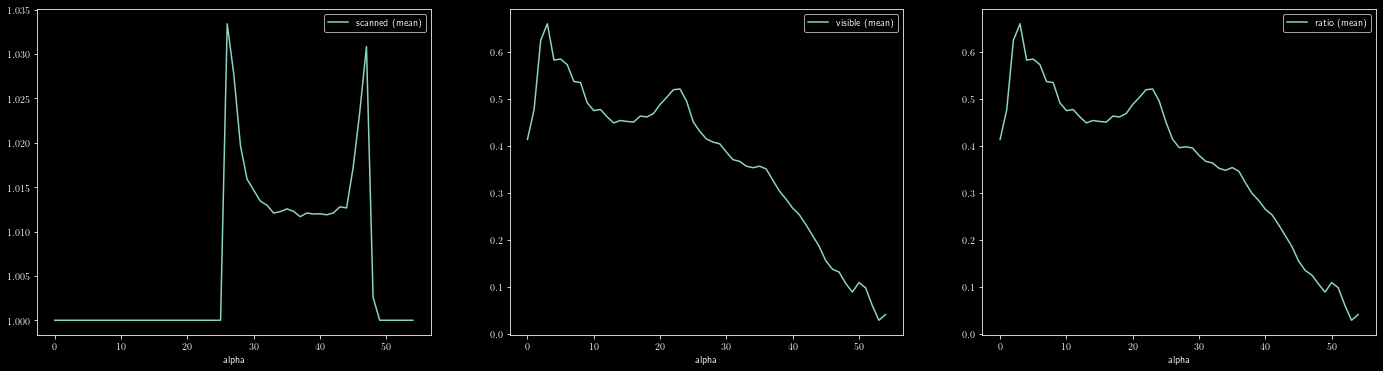

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# plot alpha
for i, column in enumerate(['scanned', 'visible', 'ratio']):
    df_alpha.plot(kind='line', x='alpha', y=column, label=f'{column} (mean)', ax=axs[i])

In [20]:
# print density
density_from_mean = 1 - (ground[:, :, 1] > 0).mean()
density_from_visibility = 1 - visibility

print('density (from mean):', density_from_mean)
print('density (from visibility):', density_from_visibility)

density (from mean): 0.507781982421875
density (from visibility): 0.5058536080973954
